# Experiment 2

Comparing the counter matrix algorithm and sketching of sketches algorithm.

In [7]:
%cd ../..
%pwd

/home/zhenhao/CS5234-mini-project


'/home/zhenhao/CS5234-mini-project'

In [15]:
import numpy as np
from mini_project.algorithms.counter_matrix import L2Estimator as CMEstimator
from mini_project.algorithms.sketching_sketches import L2Estimator as SSEstimator
from mini_project.utils import check_error

## Setting hyper parameters

In [39]:
num_experiments = 5           # Number of experiments for each parameter
A = np.linspace(2, 20, 10, dtype=int)   # Values of A to take in the counter matrix
A_ = A ** 2                    # Values of A in the sketching of sketches algorithm

In [27]:
A

array([  2,   4,   8,  16,  32,  64, 128])

## Experiment for Counter matrix

In [36]:
TEST_FILE = "10000-1000000-dependent-random"
error_counter_matrix = np.zeros(len(A))

for i, a in enumerate(A):
    error_array = np.zeros(num_experiments)
    for j in range(num_experiments):
        estimator = CMEstimator(A=a, B=1)
        _, _, error = check_error(estimator, TEST_FILE, metric="l2")
        error_array[j] = error
    
    error_counter_matrix[i] = np.mean(error_array)

variance: 0.0
Estimator result: 0.0009033979435031442
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0010207499882477398
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.000931362205799007
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.000934259323644963
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0009338802653051303
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0011603131262377365
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0009786779385809932
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.001116048973018881
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0008946411617330379
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0010092280759728487
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0009985797168732614
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0009665418887170174
Answer: 0.001001669015641

In [38]:
error_counter_matrix

array([0.07322372, 0.03417304, 0.02304696, 0.01140267, 0.00937389,
       0.00686131, 0.01063113, 0.0101264 , 0.00691785, 0.00583119])

In [40]:
error_sketch_sketches = np.zeros(len(A))

for i, a in enumerate(A_):
    error_array = np.zeros(num_experiments)
    for j in range(num_experiments):
        estimator = SSEstimator(A=a, B=1)
        _, _, error = check_error(estimator, TEST_FILE, metric="l2")
        error_array[j] = error
    
    error_sketch_sketches[i] = np.mean(error_array)

variance: 0.0
Estimator result: 0.0006871914639194993
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0005096291261637398
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.001019053581926879
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0011186555778579517
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0010499551108348372
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.000923735966091034
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0011909858869485741
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0008691706369962632
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0009283895104170434
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0012602792312360672
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0010468167733764936
Answer: 0.0010016690156413597
variance: 0.0
Estimator result: 0.0010748714708274437
Answer: 0.00100166901564

In [28]:
error_sketch_sketches[0:7]

array([0.33608587, 0.10665189, 0.11785027, 0.0438532 , 0.01859522,
       0.00760032, 0.00320414])

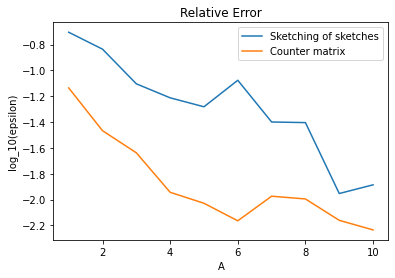

In [43]:
import matplotlib.pyplot as plt

x_axis = np.arange(10) + 1

plt.plot(x_axis, np.log10(error_sketch_sketches), label='Sketching of sketches')
plt.plot(x_axis, np.log10(error_counter_matrix), label='Counter matrix')

plt.title('Relative Error')
plt.xlabel('A')
plt.ylabel('log_10(epsilon)')
plt.legend()
plt.savefig('./dependent_random_compare.pdf')